In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [3]:
df =pd.read_csv("gRNA_all_GERP.tsv",sep="\t")

In [10]:
df2 = pd.read_csv("9112_combined_A_scores.csv",index_col=0)

In [11]:
df2.head()

,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,logHbFBase
name,,,,,,,,,,,,,
chr11:4167376-4167377,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2",2,"0.0057890256172122906, 0.05075315571133837",0.004617,12.72,0.035078,1.454965,2.335626
chr11:4167377-4167378,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3",2,"0.0006637531335270759, 0.01736156959881251",0.000361,14.39,0.021679,1.663961,3.442387
chr11:4167380-4167381,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6",2,"0.00018472146078126313, 0.01994125184132767",0.000145,11.98,0.033376,1.476566,3.837755
chr11:4167381-4167382,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7",2,"0.0002607930129786362, 0.04178584344281158",0.000345,11.29,0.062163,1.206468,3.461704
chr11:4167383-4167384,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9",2,"0.0010517731094800192, 0.1297924727400633",0.002541,10.77,0.045018,1.346614,2.594969


In [12]:
df2.sort_values("logHbFBase").head()

,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,logHbFBase
name,,,,,,,,,,,,,
chr6:135773013-135773014,TTCTTTGCTCTAAATCAGTA,0.95031,11,TTCTTTGCTCTAAATCAGTA,0.95031,11,1,1,1.0,4.498,0.058934,1.229634,-0.0
chr11:5706360-5706361,"GCATTTCTCCACGTAGGGCC, CAATGGCATTTCTCCACGTA, CC...","0.41958, 0.00015188, 2.0769999999999998e-09","10, 15, 16",GCATTTCTCCACGTAGGGCC,0.41958,10,1,1,1.0,5.502,0.020744,1.683107,-0.0
chr11:5706357-5706358,CCTACGTGGAGAAATGCCAT,0.19819,9,CCTACGTGGAGAAATGCCAT,0.19819,9,1,1,1.0,7.743,0.013848,1.858613,-0.0
chr11:5706355-5706356,CCTACGTGGAGAAATGCCAT,0.19819,11,CCTACGTGGAGAAATGCCAT,0.19819,11,1,1,1.0,8.031,0.012930,1.888401,-0.0
chr11:5706339-5706340,"GAAAGTGAAAGATAAACTAT, GGAAAGTGAAAGATAAACTA, AA...","0.025113, 0.7977, 0.089017","18, 19, 11",AAAGATAAACTATGGGCCAA,0.089017,11,1,1,1.0,9.438,0.038615,1.413244,-0.0


In [13]:
df2.sort_values("logHbFBase",ascending=False).head()

,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,logHbFBase
name,,,,,,,,,,,,,
chr2:57948197-57948198,"CAGGAAGACACAGCGGACTG, ACGAGGCCAGGAAGACACAG, AG...","0.1792, 0.0, 8.394399999999999e-09, 1.2919e-07","4, 11, 3, 2","CAGGAAGACACAGCGGACTG, ACGAGGCCAGGAAGACACAG, AG...","0.1792, 0.0, 8.394399999999999e-09, 1.2919e-07","4, 11, 3, 2",4,"0.25578477538185723, 3.118081756103646e-299, 1...",3.657379e-306,8.406,0.025955,1.585779,305.436830
chr11:5173162-5173163,"TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","1, 2, 5","TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","1, 2, 5",3,"3.869669530222119e-299, 0.0015188677152428067,...",8.237872e-304,19.200,0.002727,2.564251,303.084185
chr11:5173167-5173168,"TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","6, 7, 10","TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","6, 7, 10",3,"1.74326880333313e-300, 0.0012505068437606163, ...",1.044272e-303,4.582,0.074771,1.126267,302.981186
chr11:5173168-5173169,"TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","7, 8, 11","TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","7, 8, 11",3,"3.65292800444196e-300, 0.00240677465620518, 1....",3.100096e-303,8.334,0.040297,1.394727,302.508625
chr11:5305929-5305930,TACTCATGGTCTATCTCTCC,0.0,5,TACTCATGGTCTATCTCTCC,0.0,5,1,1.2347691228694058e-300,1.234769e-300,7.766,0.029630,1.528268,299.908414


In [14]:
df.shape

(13147, 6)

In [15]:
df2.shape

(9112, 13)

In [16]:
df.index = df['chrom']+":"+df['start'].astype(str)+"-"+df['end'].astype(str)

In [17]:
df.head()

,chrom,start,end,ref,alt,gerp_bp_score
chr11:4167374-4167375,chr11,4167374,4167375,A,G,2.3100
chr11:4167376-4167377,chr11,4167376,4167377,A,G,1.0300
chr11:4167377-4167378,chr11,4167377,4167378,A,G,3.3500
chr11:4167380-4167381,chr11,4167380,4167381,A,G,-0.0682
chr11:4167381-4167382,chr11,4167381,4167382,A,G,-0.5520


In [18]:
df['CADD'] = df2['CADD']
df['DeepSEA'] = df2['DeepSEA']
df['HbFBase'] = df2['logHbFBase']

In [19]:
df = df.dropna()

In [20]:
df.shape

(9112, 9)

             High          Low
count  152.000000  1136.000000
mean     0.264518     0.126045
std      3.159480     3.025175
min     -9.370000   -11.400000
25%     -1.477500    -1.425000
50%      0.401000     0.263000
75%      2.610000     2.060000
max      5.840000     6.080000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


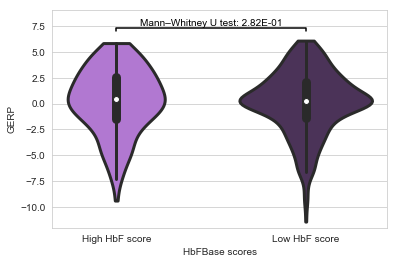

In [21]:

from decimal import Decimal
sns.set_style("whitegrid")
top_n = df[df['HbFBase']>=50]['gerp_bp_score'].tolist()
bot_n = df[df['HbFBase']==0]['gerp_bp_score'].tolist()
plot_df = pd.DataFrame([top_n,bot_n]).T
plot_df.columns = ['High',"Low"]
print (plot_df.describe())
plot_df = pd.melt(plot_df)
color_dict={}
color_dict['High'] = "#b569e0"
color_dict['Low'] = "#4d2d5e"
sns.violinplot(x="variable",y='value',data=plot_df,palette =color_dict,linewidth=3,width=0.7,cut=0)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
y=7
h=0.3
# print (scipy.stats.ttest_ind(top_n,bot_n).pvalue)
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c="black")
plt.text(0.5, y+h+0.05, "Mann–Whitney U test: %.2E" % scipy.stats.mannwhitneyu(top_n,bot_n).pvalue, ha='center', va='bottom', color="black")
plt.ylim(-12,9)



plt.xticks([0,1],['High HbF score','Low HbF score'])
plt.xlabel("HbFBase scores")
plt.ylabel("GERP")
plt.savefig("GERP-HbFBase-high-low.pdf", bbox_inches='tight')